# Data Analysis (Assignment 7)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

### Table of Contents
- Uploading Cleaned Data
- New blocks to add to existing blocks from Assignment 6
    - 1. The Credibility of LinkedIn Influencers: Do followers correlate with their work history?
    - 2. Gender Bias: Are women actually more likely to have shorter tenures?
    - 3. What are the differences in the types of positions that younger people hold, in comparision to those held by older people?
    - 4. Which Fortune 500 companies have the highest racial diversity?

### Uploading Data

**1. Upload Fortune 500 data**

In [3]:
f_500 = pd.read_csv('../data/clean/Fortune500.csv', encoding='latin-1')

**2. Upload first out of two datasets**

In [4]:
linkedin_original = pd.read_csv('../data/clean/linkedin_original.csv', encoding='latin-1')

In [5]:
linkedin_original.head(5)

,avg_position_len,company_name,n_positions,age,beauty,blur,ethnicity,gender,smile,n_followers
0,457.0,TD,1,37,57.57,0.421,Asian,0,77.536,420
1,212.0,Light Up The World (LUTW),1,37,57.57,0.421,Asian,0,77.536,420
2,243.0,Glacier,1,37,57.57,0.421,Asian,0,77.536,420
3,123.0,Sprout App,1,37,57.57,0.421,Asian,0,77.536,420
4,244.0,College Pro,1,37,57.57,0.421,Asian,0,77.536,420


Extra step: Because many of the following analyses involve the Fortune 500, apply a Fortune 500 check to the dataset.

In [6]:
f_500_check = np.where(linkedin_original.company_name.isin(f_500.company_name), True, False)
linkedin_original['f_500_check'] = f_500_check
linkedin_original.head(5)

,avg_position_len,company_name,n_positions,age,beauty,blur,ethnicity,gender,smile,n_followers,f_500_check
0,457.0,TD,1,37,57.57,0.421,Asian,0,77.536,420,False
1,212.0,Light Up The World (LUTW),1,37,57.57,0.421,Asian,0,77.536,420,False
2,243.0,Glacier,1,37,57.57,0.421,Asian,0,77.536,420,False
3,123.0,Sprout App,1,37,57.57,0.421,Asian,0,77.536,420,False
4,244.0,College Pro,1,37,57.57,0.421,Asian,0,77.536,420,False


**3. Upload second out of two datasets**

In [7]:
linkedin_updated = pd.read_csv('../data/clean/linkedin_updated.csv', encoding='latin-1')

In [8]:
linkedin_updated.head(5)

,ageEstimate,companyFollowerCount,companyName,companyStaffCount,connectionsCount,followersCount,genderEstimate,hasPicture,isPremium,posTitle,avgMemberPosDuration
0,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Portfolio Executive,760.5000
1,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Solution Delivery Executive,760.5000
2,41.0,10047.0,CommSec,619.0,500.0,506.0,0.0,0,0.0,Project Manager,760.5000
3,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Project Manager,760.5000
4,30.0,300723.0,PayPal,22522.0,500.0,951.0,1.0,1,0.0,Senior Marketing Manager,395.2857


## 1. The Credibility of LinkedIn Influencers: Do followers correlate with work history?

Whenever I log into LinkedIn, I see dozens of supposedly inspirational posts about the author's success story or recruitment experience. More often than not, these posts come off as narcissistic, "cringey," and attention-seeking, rather than helpful. Because of posts like these, LinkedIn influencers have been the subject of many online memes. Also, often times, these influencers do not have a strong work history to support the claims they make in their posts. In my analysis, I examine the credibility of LinkedIn influencers by identifying whether or not they work at Fortune 500 companies. 

Note: I consider LinkedIn users with over 5,000 followers to be "LinkedIn influencers." Because of their considerably large following, I deem that they'd have an influencer on a larger number of people than users with smaller followings.

**1. Create a subset of the data containing only LinkedIn influencers.**

In [9]:
influencer = linkedin_original[linkedin_original['n_followers']>5000]
influencer.head(10)

,avg_position_len,company_name,n_positions,age,beauty,blur,ethnicity,gender,smile,n_followers,f_500_check
258,1673.00,HEAT Software,1,49,46.314,1.106,White,1,3.626,5436,False
259,184.00,MWEB,1,49,46.314,1.106,White,1,3.626,5436,False
260,517.25,Microsoft South Africa,4,49,46.314,1.106,White,1,3.626,5436,False
261,275.00,"Microsoft West, East & Central Africa and Indi...",1,49,46.314,1.106,White,1,3.626,5436,False
262,1673.00,HEAT Software,1,49,46.314,1.106,White,1,3.626,5436,False
263,184.00,MWEB,1,49,46.314,1.106,White,1,3.626,5436,False
264,517.25,Microsoft South Africa,4,49,46.314,1.106,White,1,3.626,5436,False
265,275.00,"Microsoft West, East & Central Africa and Indi...",1,49,46.314,1.106,White,1,3.626,5436,False
782,1064.00,GE,1,42,60.608,1.647,White,0,30.886,17054,False
783,2161.00,PepsiCo,1,42,60.608,1.647,White,0,30.886,17054,True


**2. Create another subset for non-influencers.**

In [10]:
not_influencer = linkedin_original[linkedin_original['n_followers']<=5000]
not_influencer.head(10)

,avg_position_len,company_name,n_positions,age,beauty,blur,ethnicity,gender,smile,n_followers,f_500_check
0,457.0,TD,1,37,57.57,0.421,Asian,0,77.536,420,False
1,212.0,Light Up The World (LUTW),1,37,57.57,0.421,Asian,0,77.536,420,False
2,243.0,Glacier,1,37,57.57,0.421,Asian,0,77.536,420,False
3,123.0,Sprout App,1,37,57.57,0.421,Asian,0,77.536,420,False
4,244.0,College Pro,1,37,57.57,0.421,Asian,0,77.536,420,False
5,304.0,Microsoft,1,37,57.57,0.421,Asian,0,77.536,420,True
6,457.0,TD,1,37,57.57,0.421,Asian,0,77.536,420,False
7,212.0,Light Up The World (LUTW),1,37,57.57,0.421,Asian,0,77.536,420,False
8,243.0,Glacier,1,37,57.57,0.421,Asian,0,77.536,420,False
9,123.0,Sprout App,1,37,57.57,0.421,Asian,0,77.536,420,False


**3. Compare the proportion of LinkedIn influncers vs. regular users who work at Fortune 500 companies**

In [11]:
influencer_f500 = len(influencer[influencer['f_500_check']==True])/len(influencer)
influencer_f500

0.1845042678923178

In [12]:
not_influencer_f500 = len(not_influencer[not_influencer['f_500_check']==True])/len(not_influencer)
not_influencer_f500

0.18106579536596287

In [13]:
influencer_f500-not_influencer_f500

0.00343847252635493

**4. Further examination — using age as a proxy for credibility: Are influencers typically older than the average Linkedin user?**

In [14]:
influencer['age'].mean()

45.406434668417596

In [15]:
not_influencer['age'].mean()

44.225366128737996

**Results/Observations**

The difference between the proportions is about 0.34%. This is a very small difference and suggests that influencer do not actually have more experience working at renowned companies than other users. Additionally, the difference between average age is about 1 year. Similar to the difference in Fortune 500 proportions, this is a very small difference. It further supports the idea that influencers are not very different than the average user.

## 2. Gender Bias: Are women actually more likely to have shorter tenures?

Many employers exercise bias against women by being less likely to hire them because they are known to have shorter tenures. With that being said, here's an article in The Guardian (https://www.theguardian.com/money/2014/aug/12/managers-avoid-hiring-younger-women-maternity-leave) that confirms that "40% of managers avoid hiring younger women to get around maternity leave". I thought it would be interesting to investigate the underlying assumption behind this bias: are women actually more likely to have shorter tenures at companies?

Note: For `genderEstimate`, 1 = female and 0 = male.

**1. Subset based on gender**

In [16]:
women = linkedin_updated[linkedin_updated['genderEstimate']==1.0]

In [17]:
men = linkedin_updated[linkedin_updated['genderEstimate']==0.0]

**2. Subset further to focus on younger population, since women who are younger tend to have children and go on maternity leave**

In [18]:
women_under50 = women[women['ageEstimate']<=50]

In [19]:
men_under50 = men[men['ageEstimate']<=50]

**3. Compare the average position duration of the two genders**

In [20]:
women_duration = women['avgMemberPosDuration'].mean()
women_duration

821.3181449618376

In [21]:
men_duration = men['avgMemberPosDuration'].mean()
men_duration

923.0265252288799

In [22]:
men_duration-women_duration

101.70838026704234

In [23]:
(men_duration-women_duration)/women_duration

0.12383554520370205

**4. Compare the average position duration of the two genders, ages 50 and under**

In [24]:
women_under50_duration = women_under50['avgMemberPosDuration'].mean()
women_under50_duration

779.4521451461611

In [25]:
men_under50_duration = men_under50['avgMemberPosDuration'].mean()
men_under50_duration

841.0246491796952

In [26]:
men_under50_duration-women_under50_duration

61.572504033534074

In [27]:
(men_under50_duration-women_under50_duration)/women_under50_duration

0.078994591800101

**5. Create data visualizations to display the trend between age and position duration for women and men**

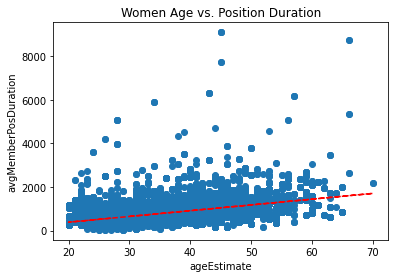

In [28]:
women.dropna(inplace=True)
x = women['ageEstimate']
y = women['avgMemberPosDuration']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('ageEstimate')
plt.ylabel('avgMemberPosDuration')
plt.title('Women Age vs. Position Duration');

plt.show()

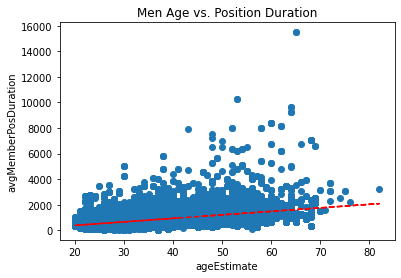

In [29]:
men.dropna(inplace=True)
x = men['ageEstimate']
y = men['avgMemberPosDuration']

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xlabel('ageEstimate')
plt.ylabel('avgMemberPosDuration')
plt.title('Men Age vs. Position Duration');

plt.show()

**Results/Observations**

On average, men hold a position for about 102 days longer than women do. The duration of men's positions are about 12.4% longer than that of women's.

Young men hold positions for about 62 days less than young women, and the duration of young men's positions are about 7.9% longer than that of young women's. We expect this difference do be larger than the difference among all women and men. However, the difference is smaller, and it supports the idea that hiring managers' distaste for hiring young women has less to do with maternity leave than it does with gender bias. 

Lastly, as seen with the trend lines in the two scatter plots, the trend between age and position duration is similar for both men and women. Position duration increases with age, without discriminating based on gender.

## 3. What are the differences in the types of positions held by people newer to the job market, in comparision to those held by people who are more experienced?

I've learned that employers often have negative attitudes towards older, or more experienced, workers. A survey (https://www.aarp.org/work/working-at-50-plus/info-2018/age-discrimination-common-at-work.html) found that "76 percent" of older workers "see age discrimination as a hurdle to finding a new job." I wonder, what sort of positions do young people, who are new to the job market, hold? How do they differ from those held by experienced people? Also, as someone entering the job market soon, what are some positions that would welcome newly graduated students, and as I advance in my career, what are the positions that would be open to me?

Note: In my analysis, I consider people 30 and younger to be new to the job market, whereas those who are older than 30 are considered experienced.

**1. Subset based on age**

In [30]:
new = linkedin_updated[linkedin_updated['ageEstimate']<=30]

In [31]:
experienced = linkedin_updated[linkedin_updated['ageEstimate']>30]

**2. Create a word cloud from the posTitle column to show the common titles held by people new to the job market**

In [32]:
from wordcloud import WordCloud
from collections import Counter

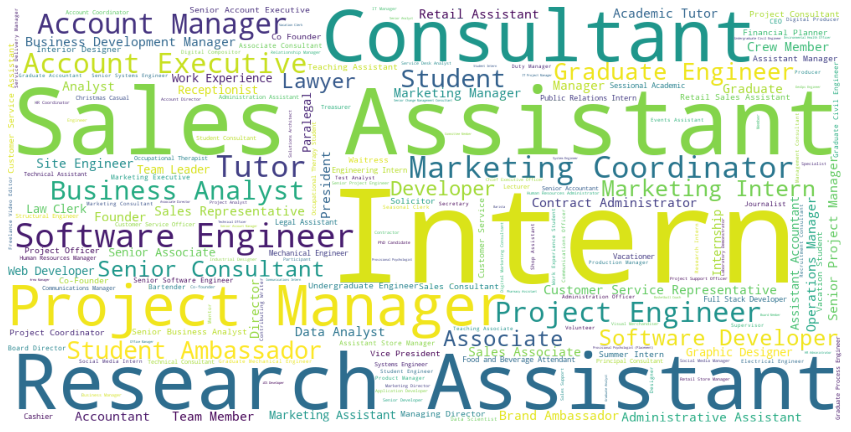

In [33]:
word_could_dict=Counter(new['posTitle'])
wordcloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
counter_obj = Counter(new['posTitle'])
counter_obj.most_common()[:10]

[('Intern', 75),
 ('Sales Assistant', 68),
 ('Research Assistant', 59),
 ('Consultant', 51),
 ('Project Manager', 50),
 ('Software Engineer', 42),
 ('Tutor', 33),
 ('Marketing Coordinator', 33),
 ('Account Manager', 32),
 ('Account Executive', 31)]

**3. Create a word cloud from the posTitle column to show the common titles held by people more experienced in the job market**

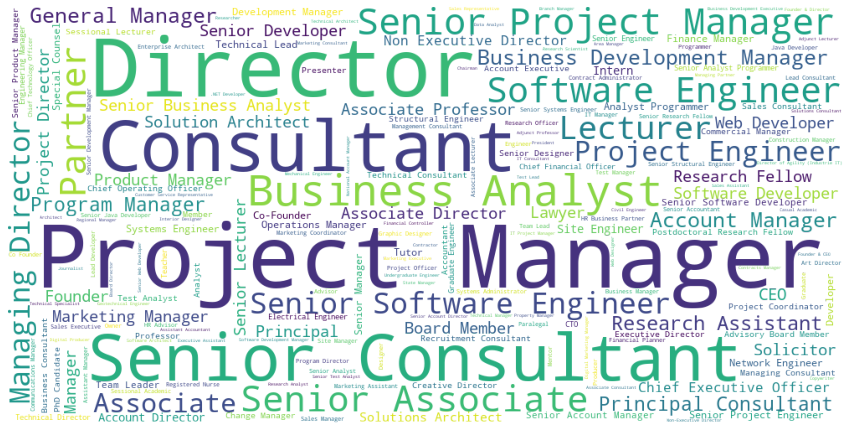

In [35]:
word_could_dict=Counter(experienced['posTitle'])
wordcloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
counter_obj = Counter(experienced['posTitle'])
counter_obj.most_common()[:10]

[('Project Manager', 390),
 ('Director', 334),
 ('Consultant', 243),
 ('Senior Consultant', 205),
 ('Business Analyst', 164),
 ('Senior Project Manager', 162),
 ('Partner', 153),
 ('Senior Associate', 152),
 ('Software Engineer', 142),
 ('Lecturer', 122)]

**Results/Observations**

As seen in the first word cloud, "intern" is the most common job title amongst people who are newer to the job market. This is followed by "sales assistant" and "research assistant." Amongst experienced people, "project manager" is the most common job title, followed by "director" and "consultant." There are some overlap in the two lists — "project manager," "consultant," and "software engineer" are common for both inexperienced and experienced people.

## 4. Which companies from the Fortune 500 have the highest racial diversity?

Further diving into my analysis of racial diversity in the workplace, I want to identify which companies out of the Fortune 500 list have minority statistics that reflect their racial diversity statements. Are these statements just PR, or do they hold truth? For this question, I'll use the `linkedin_updated` dataset because it contains data on ethnicity. As noted in my previous data analysis, there are only three different ethnicities: Asian, Black, and White. In my data analysis, I will consider Asians and Blacks as minority groups, and White as the majority racial group.

**1. Subset so that each company has more than 1 LinkedIn user working there**

For some companies in the dataset, there's only 1 LinkedIn user working there, even when the company has a large workforce. In this situation, if the user happens to be Asian or Black, then the data analysis will show that the company has 100% diversity, which is untrue in reality. To more accurately examine the racial diversity of the companies, we must examine only the companies with more than 1 LinkedIn user.

In [37]:
#group by counting the number of users, using the proxy of n_positions, for each company in the dataset
num_users_per_co = linkedin_original.groupby(['company_name']).agg({'n_positions':'count'})
num_users_per_co.head()

,n_positions
company_name,
ABA Therapist,1
Activant Solutions -Now Epicor,1
Bio-Technology,1
Coller School of Management,2
Scrapbook Productions LLC,1


In [38]:
#identify the companies with only 1 user
only_one = num_users_per_co[num_users_per_co['n_positions']==1]
only_one.head()

,n_positions
company_name,
ABA Therapist,1
Activant Solutions -Now Epicor,1
Bio-Technology,1
Scrapbook Productions LLC,1
! CB Repossessions !,1


In [39]:
#filter the dataset based on the companies in only_one to remove companies with only 1 LinkedIn user
filter_list = list(only_one.index)

In [40]:
linkedin_multiple = linkedin_original[~linkedin_original['company_name'].isin(filter_list)]

**2. Create a new column `minority` that checks whether the user is part of a minority group.**

In [41]:
linkedin_multiple['minority'] =np.where(linkedin_multiple["ethnicity"].str.contains("Asian|Black"), 1,0) 

In [42]:
f_500_df = linkedin_multiple[linkedin_multiple['f_500_check'] == True]
f_500_df.head()

,avg_position_len,company_name,n_positions,age,beauty,blur,ethnicity,gender,smile,n_followers,f_500_check,minority
5,304.0,Microsoft,1,37,57.570,0.421,Asian,0,77.536,420,True,1
11,304.0,Microsoft,1,37,57.570,0.421,Asian,0,77.536,420,True,1
12,1430.0,Microsoft,1,52,61.982,0.249,White,0,73.185,311,True,0
15,1430.0,Microsoft,1,52,61.982,0.249,White,0,73.185,311,True,0
19,1003.0,Microsoft,1,28,81.561,0.568,Asian,1,68.108,331,True,1


**3. Group companies, based on the mean of the `minority` column. This allows us to accurately compare the racial diversity of the employee base, using proportions.**

In [43]:
minority_rank = f_500_df.groupby(['company_name']).agg({'minority':'mean'}).sort_values(by='minority', ascending=False)

In [44]:
f500_top_20 = minority_rank.head(20)
f500_top_20

,minority
company_name,
Tenneco,1.000000
Weyerhaeuser,0.666667
Applied Materials,0.666667
DXC Technology,0.625000
Walmart,0.571429
McKesson,0.500000
Western Digital,0.500000
Analog Devices,0.500000
S&P Global,0.500000


**4. Note any oddities in the data**

In [45]:
minority_rank[minority_rank['minority']==0.0].count()

minority    24
dtype: int64

In [46]:
int(minority_rank[minority_rank['minority']==0.0].count())/len(minority_rank)

0.24242424242424243

In [47]:
f500_top_20['minority'].mean()

0.517124458874459

In [48]:
linkedin_multiple['minority'].mean()

0.24544304138283837

**5. Create a data visualization that shows the minority proportions of these companies more clearly**

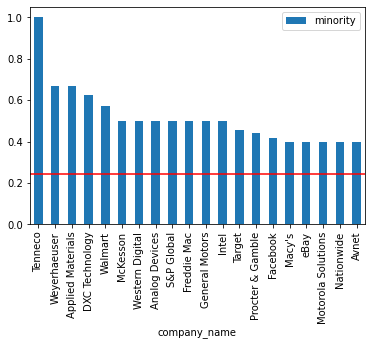

In [49]:
f500_top_20.plot(kind='bar')
plt.axhline(y=linkedin_multiple['minority'].mean(), color='r', linestyle='-')

**Results/Observations**

Nearly half of the LinkedIn users who work at Fortune 500 companies is part of a minority group. However, based on my data, 24, or 24%, of the Fortune 500 companies within the data have a minority base of 0%. This is a relatively large percentage and suggests that the racial diversity is concentrated in a few of the Fortune 500 companies, rather than spread out amongst all of them.